## Linear Basis Function Regression

The closed form solution for the maximum likelihood weight vector is given by:

$$ w_{ML} = (\phi^T\phi)^{-1}\phi^{T}t $$

The data is generated using :

$$ y(x) = cos(\pi x) + 1.5cos(2\pi x)$$
and hence:
$$t = y(x,w) + \epsilon$$

where is $\epsilon$ is added noise. Assuming we don't know the real basis for these points and want to try polynomial fitting to the provided dataset. The polynomial basis is given by:

$$ \phi_0(x) = 1, \phi_1(x) = x ..., \phi_M(x) = x^M$$

The procedure to compute the MLE estimate is:
1. The Likelihood function is given by 
$$ E_D(w) = ... $$
The derivative of which leads to the closed form solution above. To evaluate the $w_ML$ gradient descent methods are used. Using the batch gradient descent method which iterates over the entire dataset
$$w^{\tau +1} = w_{\tau} - \eta \nabla_w E_D(w)$$

where $\eta$ is the learning rate.


(11,)
(11, 8)
[ 0.59565947  0.96592302  0.          0.02172924 -0.          0.24000549
  0.          0.        ]


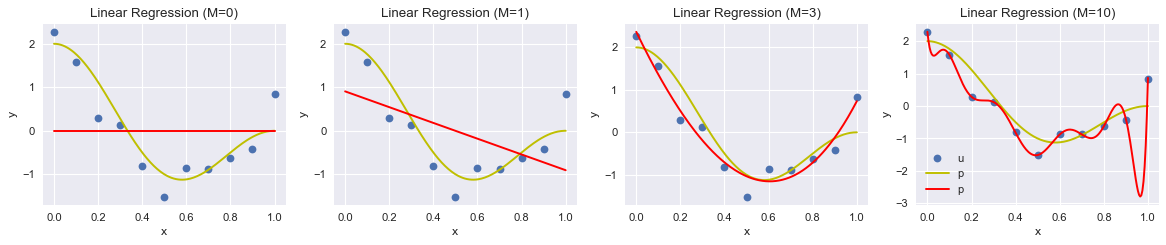

In [46]:
%matplotlib inline
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import linear_model
def getData():
    # load the fitting data and (optionally) plot out for examination
    # return the X and Y as a tuple

    data = pl.loadtxt('curvefittingp2.txt')

    X = data[0,:]
    Y = data[1,:]
    return (X,Y)

def cos_fn(X):
    Y = np.cos(np.pi*X) + np.cos(2*np.pi*X)
    return Y

def lasso_weights(X_train, y_train, lambd=0.1):
    clf = linear_model.Lasso(lambd)
    clf.fit(X_train, y_train)
    return clf.coef_

def polynomial_basis(x, M):
    poly = np.arange(M+1)
    X = np.power(np.array([x]).T, poly)
    return X

def cosine_basis(x, M=8):
    X = np.cos(np.pi*np.array(x))
    for i in range(2, M+1):
        X = np.vstack((X, np.cos(float(i)*np.pi*x)))
    return X.T

def cosine_basis_1(x, M=8):
    X = np.ones(np.shape(x))
    for i in range(1, M+1):
        X = np.vstack((X, np.cos(float(i)*np.pi*x)))
    return X.T

# These weights are calculated using the closed form in ridge regression
#def weights(X, Y, M, lambd=0):
#    theta = np.dot(np.linalg.inv(lambd*np.identity(M+1) + (np.dot(X.T, X))), np.dot(X.T, Y))
#    return theta

def weights(X, Y, M, lambd=0):
    theta = np.dot(np.dot(np.linalg.inv((np.dot(X.T, X))), X.T), Y)
    return theta
 
def predict(x, M, theta):
    X = polynomial_basis(x, M)
    Y_hat = np.dot(X, theta)
    return Y_hat

def sum_of_squares(x, Y, M, theta):
    loss = predict(x,M, theta) - Y
    J_theta = np.sum(loss**2)/2.0
    return J_theta


# Closed form part of sum of squares gradient
def sum_of_squares_grad(x, Y, M, theta):
    loss = predict(x,M,theta) - Y
    X = polynomial_basis(x, M)
    grad = np.dot(X.T, loss)
    return grad

# Numerical derivative of the sum of squares function by
# finite difference method
def approx_gradient_method(func, x, Y, M, theta, delta):
    # This is the alternate method
    #grad = (func(x+dv) - func(x-dv))/(2.0*delta)
    dv = np.eye(theta.shape[0], dtype=np.float64)
    dv = np.multiply(dv, delta)
    grad = np.empty(theta.shape[0])
    for i in range(theta.shape[0]):
        grad[i] = (func(x, Y, M, theta+dv[i]) - func(x, Y, M, theta-dv[i]))/(2.0*delta)
    return grad


if __name__ == '__main__':
    
    # The data provided for the cos function
    X, Y = getData()
    X_tr = np.linspace(0.0, 1.0, 200)
    Y_cos = cos_fn(X_tr)
    M = np.array([0, 1, 3, 10])
    plt.figure(1,figsize=(18, 3), dpi=80)
    print X.shape
    X_cb = cosine_basis(X, 8)
    X_cb_1 = cosine_basis_1(X, 8)
    print X_cb.shape
    theta_cos = weights(X_cb, Y, 8)
    theta_lasso = lasso_weights(X_cb, Y, 0.1)
    theta_cos_1 = weights(X_cb_1, Y, 8)
    theta_true = np.array([1, 1, 0, 0, 0, 0, 0, 0])
    theta_true_1 = np.array([0, 1, 1, 0, 0, 0, 0, 0, 0])
    print theta_lasso
    for i in range (M.shape[0]):
        theta = weights(polynomial_basis(X, M[i]), Y, M[i])
        plt.subplot(1, M.shape[0], i+1)
        #theta_l2 = l2_weights(polynomial_basis(X_A, M[i]), Y_A, lambd[j])
        plt.plot(X,Y,'o', label='Dataset')
        plt.plot(X_tr,Y_cos, 'y-', label='y(x)=cos_fn')
        plt.plot(X_tr, predict(X_tr, M[i], theta), 'r-', label='Poly basis')
        label = 'Linear Regression (M='+str(M[i])+ ')'
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(label)
    
    plt.legend('upper left')
    plt.savefig('2a')



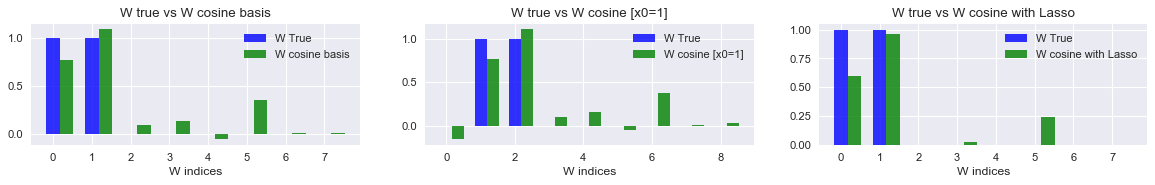

In [47]:

plt.figure(1,figsize=(18, 2), dpi=80)
bar_width = 0.35
opacity = 0.8
plt.subplot(1, 3, 1)
rects1 = plt.bar(np.arange(8), theta_true, bar_width,
                 alpha=opacity,
                 color='b',
                 label='W True')
 
rects2 = plt.bar(np.arange(8)+bar_width, theta_cos, bar_width,
                 alpha=opacity,
                 color='g',
                 label='W cosine basis')
 
plt.xlabel('W indices')
plt.title('W true vs W cosine basis')
plt.legend(loc='best')

plt.subplot(1, 3, 2)
rects1 = plt.bar(np.arange(9), theta_true_1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='W True')
 
rects2 = plt.bar(np.arange(9)+bar_width, theta_cos_1, bar_width,
                 alpha=opacity,
                 color='g',
                 label='W cosine [x0=1]')
 
plt.xlabel('W indices')
plt.title('W true vs W cosine [x0=1]')
plt.legend(loc='best')

plt.subplot(1, 3, 3)
rects1 = plt.bar(np.arange(8), theta_true, bar_width,
                 alpha=opacity,
                 color='b',
                 label='W True')
 
rects2 = plt.bar(np.arange(8)+bar_width, theta_lasso, bar_width,
                 alpha=opacity,
                 color='g',
                 label='W cosine with Lasso')
 
plt.xlabel('W indices')
plt.title('W true vs W cosine with Lasso')
plt.legend(loc='best')
plt.savefig('2d')




## 2b Finite difference derivative of the Loss function

The function is computed for M=10 polynomial basis function. Comparing the closed form solution with the finite difference method using the accuracy of the derivative vs the delta term. The accuracy of the finite difference is evaluated by:

$$ Acc(derivative) = \frac{|f'(a) - f'(b)|}{max(|f'(a)|, |f'(b)|}$$

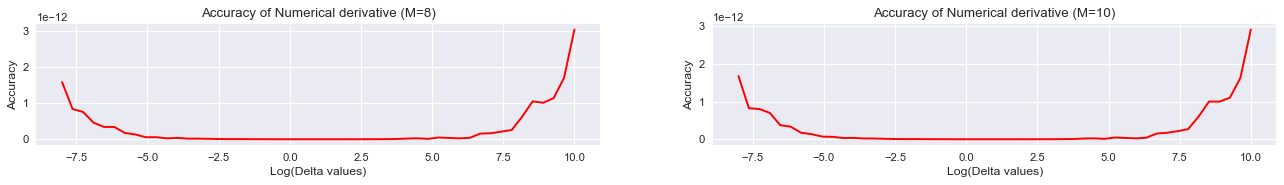

In [49]:
def acc_derivative(fa, fb):
    return (np.linalg.norm(fa - fb))/(max(np.linalg.norm(fa), np.linalg.norm(fb)))
M=np.array([8, 10])
lambd = np.exp(np.linspace(-8, 10, 50))

# Taking theta as 0
plt.figure(1,figsize=(20, 2), dpi=80)
for i in range(M.shape[0]):
    theta = np.zeros(M[i]+1)
    grad_closed_ls = sum_of_squares_grad(X, Y, M[i], theta)
    accuracy = []
    for j in range(lambd.shape[0]):
        grad_approx_ls = approx_gradient_method(sum_of_squares, X, Y, M[i], theta, lambd[j])
        accuracy.append(acc_derivative(grad_closed_ls, grad_approx_ls))
    plt.subplot(1, M.shape[0], i+1)
    plt.plot(np.log(lambd), accuracy, 'r-')
    label = 'Accuracy of Numerical derivative (M=' + str(M[i]) + ')'
    plt.xlabel('Log(Delta values)')
    plt.ylabel('Accuracy')
    plt.title(label)
plt.savefig('2b')

## 2c Batch gradient descent on SSE function

In [3]:
X_sgd, Y_sgd = getData()

def batch_gradient_descent(fobj, fgrad, init, alpha=0.01, eps=10e-8, norm=False):
    x = init
    fgradv = []
    xv = []
    fv = []
    itv = []
    it = 1
    curr_fx = fobj(x)
    curr_grad = fgrad(x)
    while True :
        grad = fgrad(x)
        
        prev_fx = curr_fx
        prev_grad = curr_grad
        
        # Parameter update
        x = x - np.multiply(alpha, grad)
        
        # Store all the values for viz
        fgradv.append(np.linalg.norm(grad))
        xv.append(x)
        fv.append(curr_fx)
        itv.append(it)
        #print x

        it = it + 1
        #Update the current value
        curr_fx = fobj(x)
        curr_grad = grad
        
        delta_fx = np.fabs(curr_fx - prev_fx)
        delta_grad = np.linalg.norm(curr_grad - prev_grad)
        #print delta_grad
        if (norm):
            if (delta_grad < eps):
                break
        else:
            if (delta_fx < eps):
                break
    return xv, fgradv, fv, itv



Closed form value [  2.28782672e+00  -6.68262361e+01   2.11216477e+03  -2.87414077e+04
   1.97611026e+05  -7.77511464e+05   1.85646853e+06  -2.73565346e+06
   2.43013426e+06  -1.19267920e+06   2.48324962e+05]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ -7.55017003e+00  -6.25322874e-03   8.22572555e+00  -7.86370685e+00
  -6.23927579e+00   1.87283686e-01  -2.78862508e+00   1.11221778e+01
  -1.48245355e+01   1.15530245e+01  -1.09267932e+01]
[ -4.67173979  -6.6009655   -9.24010157  12.01069197  23.15408917
  12.60558478  11.5113934   12.87810317 -12.36750935 -16.30589095
   0.80644996]
0.0001
0.001
0.01
Reached convergence
[ 0.37215242 -1.03266794 -0.3602677  -0.05632726  0.09475522  0.17590121
  0.2223459   0.2504131   0.26820133  0.27995808  0.28802006]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Reached convergence
[ -0.46065067  -0.82687147   8.6502356   -6.84742492  -4.91993458
   1.67065772  -1.21317081  12.75032357 -13.16621435  13.22821881
  -9.24277409]
[ -7.55017003e+00  -6

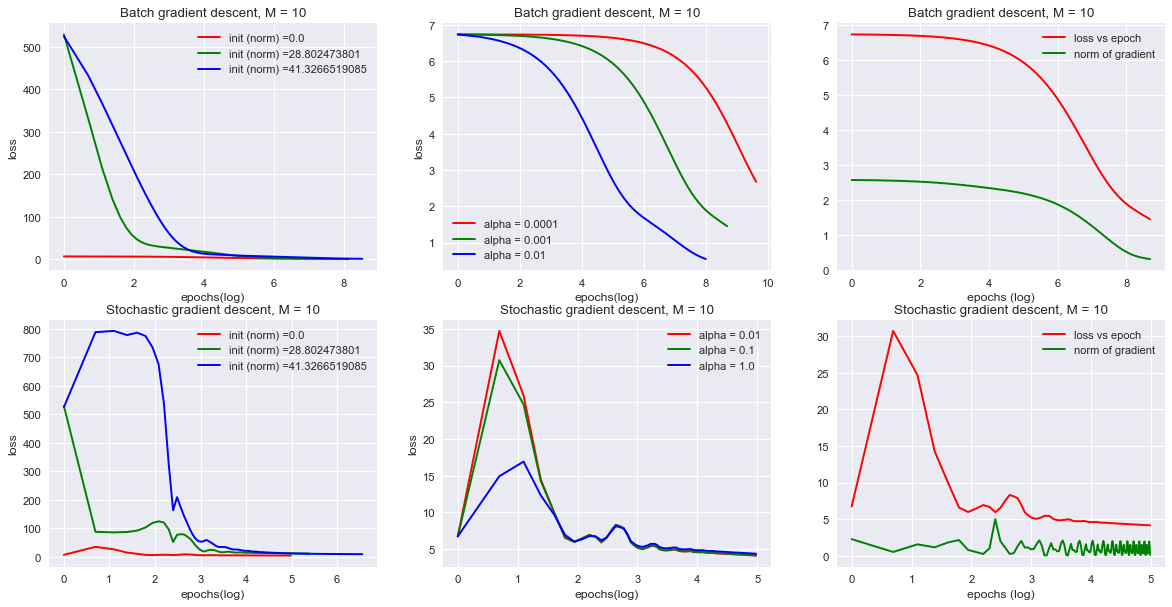

In [56]:
M = 10
def sos_fobj10(theta):
    X, Y = getData()
    return sum_of_squares(X, Y, M, theta)

def sos_fgrad10(theta):
    X, Y = getData()
    return sum_of_squares_grad(X, Y, M, theta)

X, Y_sgd = getData()
X_sgd = polynomial_basis(X, M)

def momentum(alpha, t, k):
    return (alpha+t)**(-k)

# Batch_size should be multiple of the X_ls.shape[0], otherwise np.split() won't work
# this can be worked around by manually splitting up the data set
def stochastic_gradient_descent(fobj, fgrad, init, alpha, eps=1e-6):
    # Here the eta value is (alpha+t)^-k k belongs to (0.5, 1)
    it = 1
    x = init
    fgradv = []
    xv = []
    fv = []
    itv = []
    curr_fx = fobj(x)
    while True:
        for i in range(X.shape[0]):
            grad = fgrad(x, X_sgd[i], Y_sgd[i])
            prev_fx = curr_fx
            
            # Store all the values for viz
            fgradv.append(np.linalg.norm(grad))
            xv.append(x)
            fv.append(curr_fx)
            itv.append(it)
            # Parameter update
            x = x - momentum(alpha,it, 0.9)*grad
            it = it+1

            #Update the current value
            curr_fx = fobj(x)
            delta_fx = np.fabs(curr_fx - prev_fx)
            if (delta_fx < eps):
                print "Reached convergence"
                print x
                return xv, fgradv, fv, itv

def point_sum_of_squares_grad(theta, x, y):  
    grad = x*(np.dot(x.T, theta) - y)
    return grad


plt.figure(1,figsize=(18, 9), dpi=80)
plt.subplot(2, 3, 1)
init = [np.zeros(M+1), 10.0*np.random.randn(M+1), 20.0*np.random.randn(M+1)]
color = ['r-', 'g-', 'b-']
alpha = [1e-4, 1e-3, 1e-2]

# Here the theta is closed form
theta = weights(polynomial_basis(X, M), Y, M)
print "Closed form value " + str(theta)
for i in range(len(init)):
    xsos, fgradsos, fvsos, itv = batch_gradient_descent(sos_fobj10, sos_fgrad10, init[i], 1e-2, 1e-4)
    print init[i]
    plt.plot(np.log(itv), fvsos, color[i], label='init (norm) ='+str(np.linalg.norm(init[i])))
    plt.xlabel('epochs(log)')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.title('Batch gradient descent, M = 10')

plt.subplot(2,3,2)
for i in range(len(alpha)):
    xsos, fgradsos, fvsos, itv = batch_gradient_descent(sos_fobj10, sos_fgrad10, init[0], alpha[i], 1e-4)
    print alpha[i]
    plt.plot(np.log(itv), fvsos, color[i], label='alpha = '+str(alpha[i]))
    plt.xlabel('epochs(log)')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.title('Batch gradient descent, M = 10')

plt.subplot(2,3,3)
_, _, fvsos, itv_loss = batch_gradient_descent(sos_fobj10, sos_fgrad10, init[0], alpha[1], 1e-4)
_, fgradsos, _, itv_grad = batch_gradient_descent(sos_fobj10, sos_fgrad10, init[0], alpha[1], 1e-4)
plt.plot(np.log(itv_loss), fvsos, 'r-', label='loss vs epoch')
plt.plot(np.log(itv_grad), fgradsos, 'g-', label='norm of gradient')
plt.xlabel('epochs (log)')
plt.title('Batch gradient descent, M = 10')
plt.legend(loc='best')

plt.subplot(2,3,4)
for i in range(len(init)):
    xsos, fgradsos, fvsos, itv = stochastic_gradient_descent(sos_fobj10, point_sum_of_squares_grad, init[i], 1e-2, 1e-4)
    print init[i]
    plt.plot(np.log(itv), fvsos, color[i], label='init (norm) ='+str(np.linalg.norm(init[i])))
    plt.xlabel('epochs(log)')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.title('Stochastic gradient descent, M = 10')

alpha = [1e-2, 1e-1, 1e0]
plt.subplot(2,3,5)
for i in range(len(alpha)):
    xsos, fgradsos, fvsos, itv = stochastic_gradient_descent(sos_fobj10, point_sum_of_squares_grad, init[0], alpha[i], 1e-4)
    print alpha[i]
    plt.plot(np.log(itv), fvsos, color[i], label='alpha = '+str(alpha[i]))
    plt.xlabel('epochs(log)')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.title('Stochastic gradient descent, M = 10')

plt.subplot(2,3,6)
_, _, fvsos, itv_loss = stochastic_gradient_descent(sos_fobj10, point_sum_of_squares_grad, init[0], alpha[1], 1e-4)
_, fgradsos, _, itv_grad = stochastic_gradient_descent(sos_fobj10, point_sum_of_squares_grad, init[0], alpha[1], 1e-4)
plt.plot(np.log(itv_loss), fvsos, 'r-', label='loss vs epoch')
plt.plot(np.log(itv_grad), fgradsos, 'g-', label='norm of gradient')
plt.xlabel('epochs (log)')
plt.title('Stochastic gradient descent, M = 10')
plt.legend(loc='best')
             
plt.savefig('2c_10')

Closed form value [  2.36687552 -10.73144911   6.61648601   2.48074981]
[ 0.  0.  0.  0.]
[-15.22899839  -4.16254379   1.61669579  -1.24895422]
[ 31.22888235   3.32554248  19.82218674  10.3957643 ]
0.0001
0.001
0.01
Reached convergence
[ 0.  0.  0.  0.]
Reached convergence
[-15.22899839  -4.16254379   1.61669579  -1.24895422]
Reached convergence
[ 31.22888235   3.32554248  19.82218674  10.3957643 ]
Reached convergence
0.01
Reached convergence
0.1
Reached convergence
1.0
Reached convergence
Reached convergence
[  2.36687552 -10.73144911   6.61648601   2.48074981]


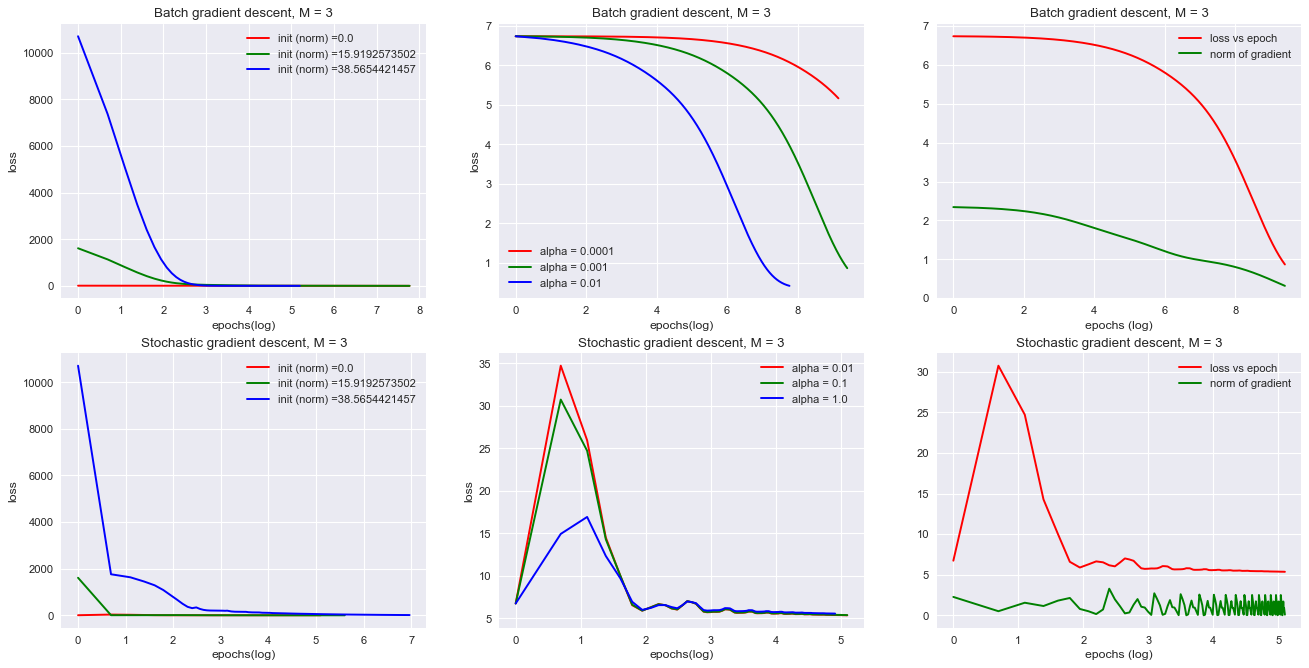

In [58]:
M = 3
def sos_fobj3(theta):
    X, Y = getData()
    return sum_of_squares(X, Y, M, theta)

def sos_fgrad3(theta):
    X, Y = getData()
    return sum_of_squares_grad(X, Y, M, theta)

X, Y_sgd = getData()
X_sgd = polynomial_basis(X, M)

def momentum(alpha, t, k):
    return (alpha+t)**(-k)

# Batch_size should be multiple of the X_ls.shape[0], otherwise np.split() won't work
# this can be worked around by manually splitting up the data set
def stochastic_gradient_descent(fobj, fgrad, init, alpha, eps=1e-6):
    # Here the eta value is (alpha+t)^-k k belongs to (0.5, 1)
    it = 1
    x = init
    fgradv = []
    xv = []
    fv = []
    itv = []
    curr_fx = fobj(x)
    while True:
        for i in range(X.shape[0]):
            grad = fgrad(x, X_sgd[i], Y_sgd[i])
            prev_fx = curr_fx
            
            # Store all the values for viz
            fgradv.append(np.linalg.norm(grad))
            xv.append(x)
            fv.append(curr_fx)
            itv.append(it)
            # Parameter update
            x = x - momentum(alpha,it, 0.9)*grad
            it = it+1

            #Update the current value
            curr_fx = fobj(x)
            delta_fx = np.fabs(curr_fx - prev_fx)
            if (delta_fx < eps):
                print "Reached convergence"
                return xv, fgradv, fv, itv

def point_sum_of_squares_grad(theta, x, y):  
    grad = x*(np.dot(x.T, theta) - y)
    return grad


plt.figure(1,figsize=(20, 10), dpi=80)
plt.subplot(2, 3, 1)
init = [np.zeros(M+1), 10.0*np.random.randn(M+1), 20.0*np.random.randn(M+1)]
color = ['r-', 'g-', 'b-']
alpha = [1e-4, 1e-3, 1e-2]

# Here the theta is closed form
theta = weights(polynomial_basis(X, M), Y, M)
print "Closed form value " + str(theta)
for i in range(len(init)):
    xsos, fgradsos, fvsos, itv = batch_gradient_descent(sos_fobj3, sos_fgrad3, init[i], 1e-2, 1e-4)
    print init[i]
    plt.plot(np.log(itv), fvsos, color[i], label='init (norm) ='+str(np.linalg.norm(init[i])))
    plt.xlabel('epochs(log)')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.title('Batch gradient descent, M = 3')

plt.subplot(2,3,2)
for i in range(len(alpha)):
    xsos, fgradsos, fvsos, itv = batch_gradient_descent(sos_fobj3, sos_fgrad3, init[0], alpha[i], 1e-4)
    print alpha[i]
    plt.plot(np.log(itv), fvsos, color[i], label='alpha = '+str(alpha[i]))
    plt.xlabel('epochs(log)')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.title('Batch gradient descent, M = 3')

plt.subplot(2,3,3)
_, _, fvsos, itv_loss = batch_gradient_descent(sos_fobj3, sos_fgrad3, init[0], alpha[1], 1e-4)
_, fgradsos, _, itv_grad = batch_gradient_descent(sos_fobj3, sos_fgrad3, init[0], alpha[1], 1e-4)
plt.plot(np.log(itv_loss), fvsos, 'r-', label='loss vs epoch')
plt.plot(np.log(itv_grad), fgradsos, 'g-', label='norm of gradient')
plt.xlabel('epochs (log)')
plt.title('Batch gradient descent, M = 3')
plt.legend(loc='best')

plt.subplot(2,3,4)
for i in range(len(init)):
    xsos, fgradsos, fvsos, itv = stochastic_gradient_descent(sos_fobj3, point_sum_of_squares_grad, init[i], 1e-2, 1e-4)
    print init[i]
    plt.plot(np.log(itv), fvsos, color[i], label='init (norm) ='+str(np.linalg.norm(init[i])))
    plt.xlabel('epochs(log)')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.title('Stochastic gradient descent, M = 3')
alpha = [1e-2, 1e-1, 1e0]
plt.subplot(2,3,5)
for i in range(len(alpha)):
    xsos, fgradsos, fvsos, itv = stochastic_gradient_descent(sos_fobj3, point_sum_of_squares_grad, init[0], alpha[i], 1e-4)
    print alpha[i]
    plt.plot(np.log(itv), fvsos, color[i], label='alpha = '+str(alpha[i]))
    plt.xlabel('epochs(log)')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.title('Stochastic gradient descent, M = 3')

plt.subplot(2,3,6)
_, _, fvsos, itv_loss = stochastic_gradient_descent(sos_fobj3, point_sum_of_squares_grad, init[0], alpha[1], 1e-4)
_, fgradsos, _, itv_grad = stochastic_gradient_descent(sos_fobj3, point_sum_of_squares_grad, init[0], alpha[1], 1e-4)
plt.plot(np.log(itv_loss), fvsos, 'r-', label='loss vs epoch')
plt.plot(np.log(itv_grad), fgradsos, 'g-', label='norm of gradient')
plt.xlabel('epochs (log)')
plt.title('Stochastic gradient descent, M = 3')
plt.legend(loc='best')
             
plt.savefig('2c_3')

init = np.zeros(M+1)
# Here the theta is closed form
theta = weights(polynomial_basis(X, M), Y, M)
print theta
xsos, fgradsos, fvsos, itv = batch_gradient_descent(sos_fobj3, sos_fgrad3, init, 1e-1, 1e-6)

[  2.32537879 -10.13567097   5.1233409    3.44875746]


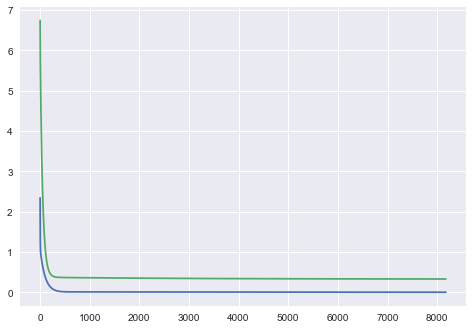

In [6]:
print xsos[-1]
plt.plot(itv, fgradsos)
plt.savefig('2c_gradient_norm_M_3_vs_iteration')
plt.plot(itv, fvsos)

[   2.30418028  -12.72779213   63.93786547 -335.92447092  783.21983046
 -784.53902949  284.56536025]
[ 2.27342668 -9.23723544  2.56040999  4.17709959  2.46061447  0.19444164
 -1.70304071]


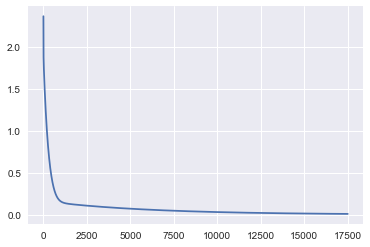

In [59]:
M = 6
def sos_fobj6(theta):
    X, Y = getData()
    return sum_of_squares(X, Y, M, theta)

def sos_fgrad6(theta):
    X, Y = getData()
    return sum_of_squares_grad(X, Y, M, theta)

init = np.zeros(M+1)
# Here the theta is closed form
theta = weights(polynomial_basis(X, M), Y, M)
print theta
xsos, fgradsos, fvsos, itv = batch_gradient_descent(sos_fobj6, sos_fgrad6, init, 1e-2, 1e-6)
print xsos[-1]
plt.plot(itv, fgradsos)
plt.savefig('2c_gradient_norm_6')

## 3.1 Ridge Regression

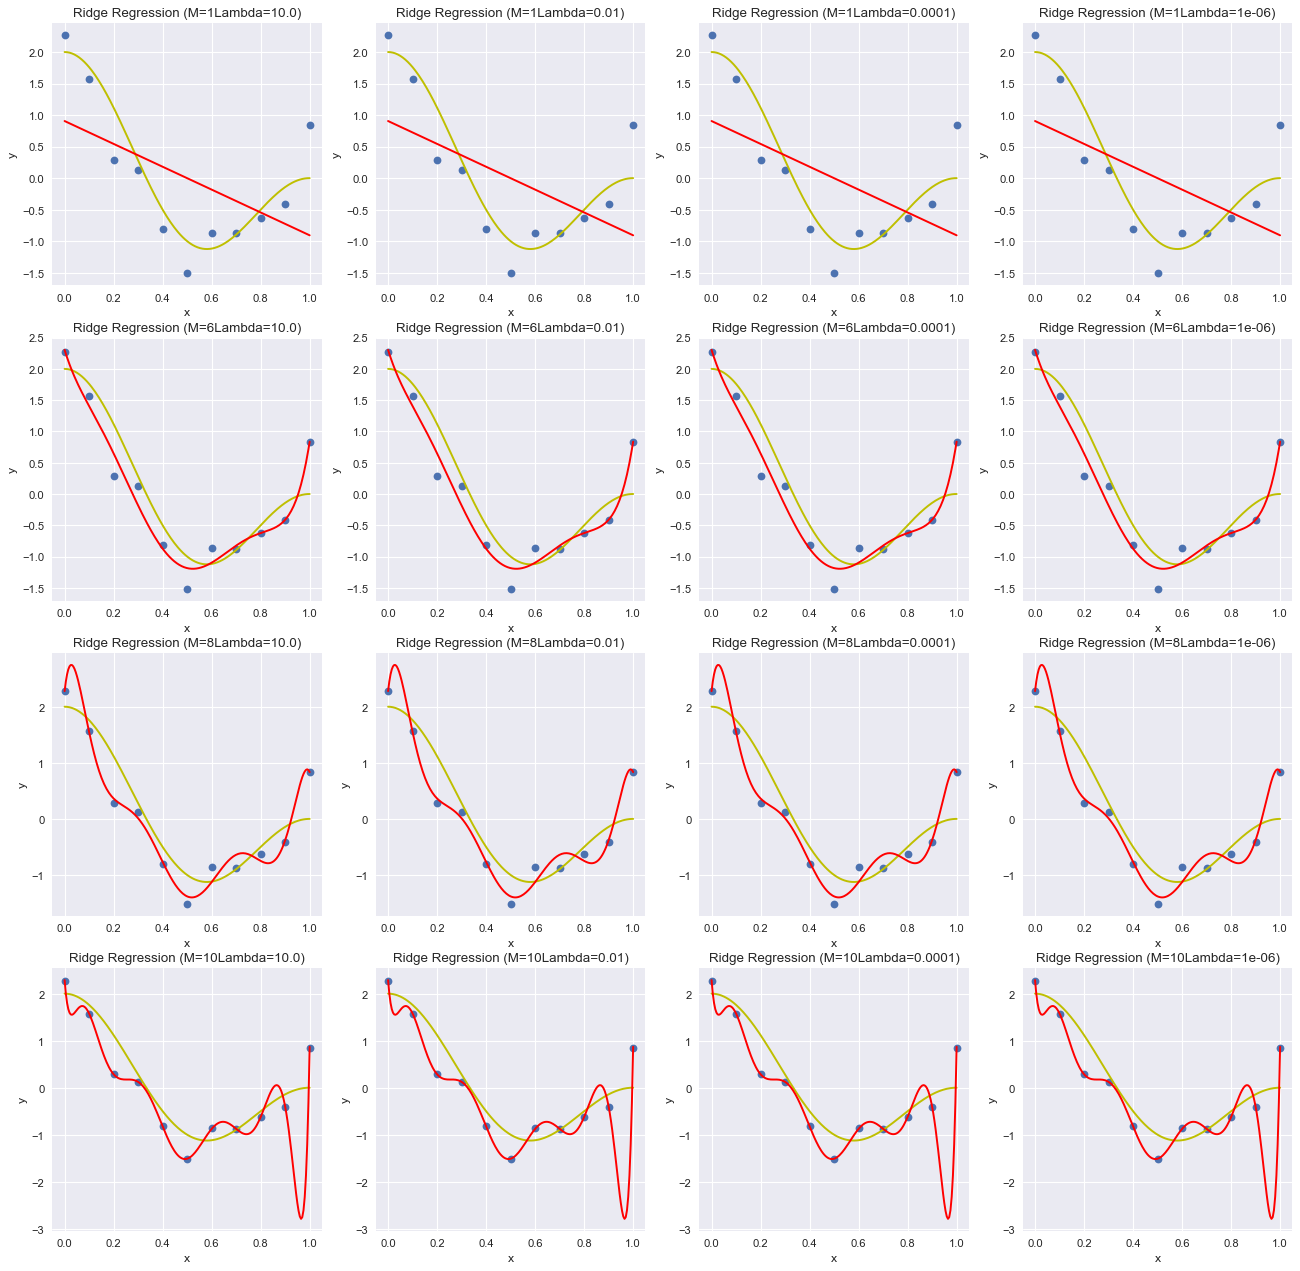

In [60]:

plt.figure(1,figsize=(20, 20), dpi=80)
M = np.array([1, 6, 8, 10])
lambd = np.array([1e1,1e-2,1e-4,1e-6])
for i in range (M.shape[0]):
    for j in range (lambd.shape[0]):
        theta = weights(polynomial_basis(X, M[i]), Y, M[i], lambd[j])
        Y_pred = predict(X_tr, M[i], theta)
        plt.subplot(M.shape[0], lambd.shape[0], M.shape[0]*i+j+1)
        plt.plot(X,Y,'o', label='Dataset')
        plt.plot(X_tr, Y_cos, 'y-', label='Y(x) function (cos)')
        plt.plot(X_tr, Y_pred, 'r-', label='Y predicted val')
        
        xlabel = 'x, M='+str(M[i])+ ', Lambda=' +str(lambd[j])
        plt.xlabel(xlabel)
        plt.ylabel('y')        
        label = 'Ridge Regression (M='+str(M[i])+ 'Lambda=' +str(lambd[j])+')'
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(label)
plt.savefig('3a')


In [9]:
 print np.random.randn(10)
print 1e4

[ 0.74758323  0.46006222 -0.25270881 -0.26635973 -0.43605395 -1.23141299
  0.94515185 -0.08014043  0.22205349 -1.01235365]
10000.0


In [17]:
print range(2,5)

[2, 3, 4]
